C:\Users\SEJAL\AppData\Local\Temp\ipykernel_22092\259825691.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill for missing values


Epoch 1/10


c:\Users\SEJAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48754/48754 ━━━━━━━━━━━━━━━━━━━━ 187s 4ms/step - loss: 0.0540 - val_loss: 0.0012
Epoch 2/10
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 206s 4ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/10
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 163s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/10
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 155s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/10
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 190s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/10
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 172s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/10
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 174s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/10
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 200s 4ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/10
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 173s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/10
48754/48754 ━━━━━━━━━━━━━━━━━━━━ 184s 4ms/step - loss: 0.0011 - val_loss: 0.0011
12189/12189 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step


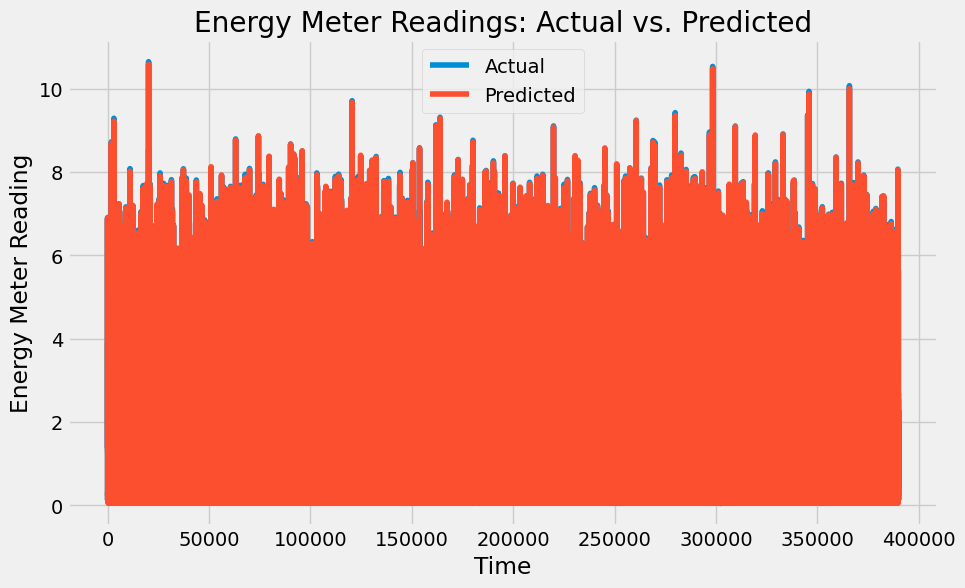

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Test2.csv')

# Convert 'Date' and 'Time' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Drop the 'Time' column if it's not needed
data.drop(columns=['Time'], inplace=True)

# Set the 'Date' column as the index if time-series modeling is desired
data.set_index('Date', inplace=True)

# Ensure all remaining columns are numeric; convert if necessary
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric

# Handle any missing values created during conversion
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Define features (X) and target (y)
x = data.drop(columns=['Global_active_power'])  # Features
y = data['Global_active_power'].values  # Target, converted to NumPy array

# Ensure target is numeric
y = pd.to_numeric(y, errors='coerce')
y = np.nan_to_num(y)  # Replace NaNs with zero or handle accordingly

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(x)

# Reshape features for LSTM input
x_scaled = x_scaled.reshape((x_scaled.shape[0], 1, x_scaled.shape[1]))  # [samples, timesteps, features]

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Convert targets to float32 for TensorFlow compatibility
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2]), activation='relu'))
model.add(Dense(1))  # Output layer for regression task

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))
#Rohan : epoch = 5

# Predict on the validation set
y_pred = model.predict(x_val)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Energy Meter Reading')
plt.title('Energy Meter Readings: Actual vs. Predicted')
plt.legend()
plt.show()
